In [1]:
import jax
import jax.numpy as jnp
from jax import grad
import os
from IPython.display import Image

# JAXで生成した計算グラフを可視化する

In [2]:
save_dir = "./out"
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

In [3]:
# 教科書2.4.2の計算
@jax.jit
def f(x1, x2):
    return (x1 + x2) * x1**2

In [4]:
z = jax.xla_computation(f)(1.0, 2.0)

save_name = os.path.join(save_dir,"test_cg_f.dot")
convert_name = os.path.join(save_dir,"test_cg_f.png")
with open(save_name, "w") as file:
    file.write(z.as_hlo_dot_graph())

In [5]:
os.system("dot {} -Tpng > {}".format(save_name, convert_name));

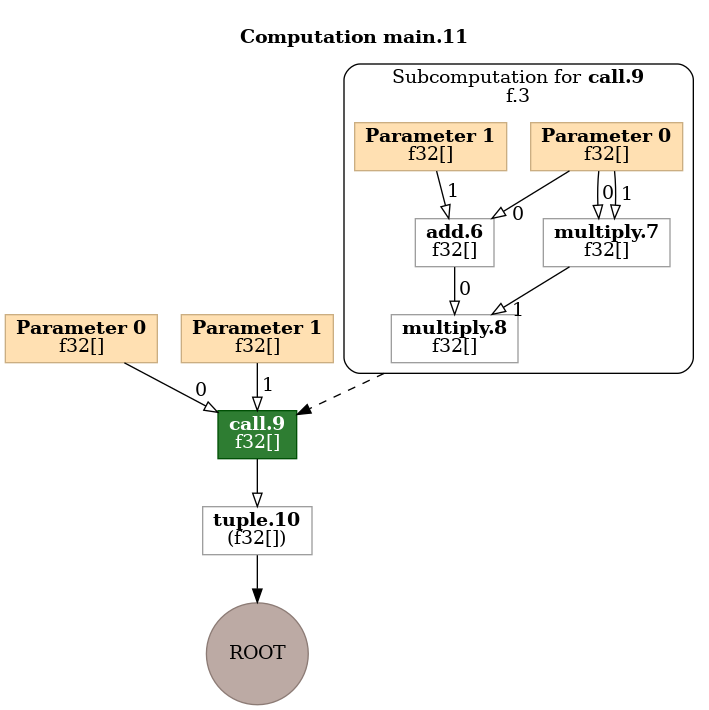

In [6]:
Image(convert_name)

In [7]:
df = grad(f)

In [8]:
z = jax.xla_computation(df)(1.0, 2.0)

save_name = os.path.join(save_dir,"test_cg_df.dot")
convert_name = os.path.join(save_dir,"test_cg_df.png")

with open(save_name, "w") as file:
    file.write(z.as_hlo_dot_graph())

In [9]:
os.system("dot {} -Tpng > {}".format(save_name, convert_name));

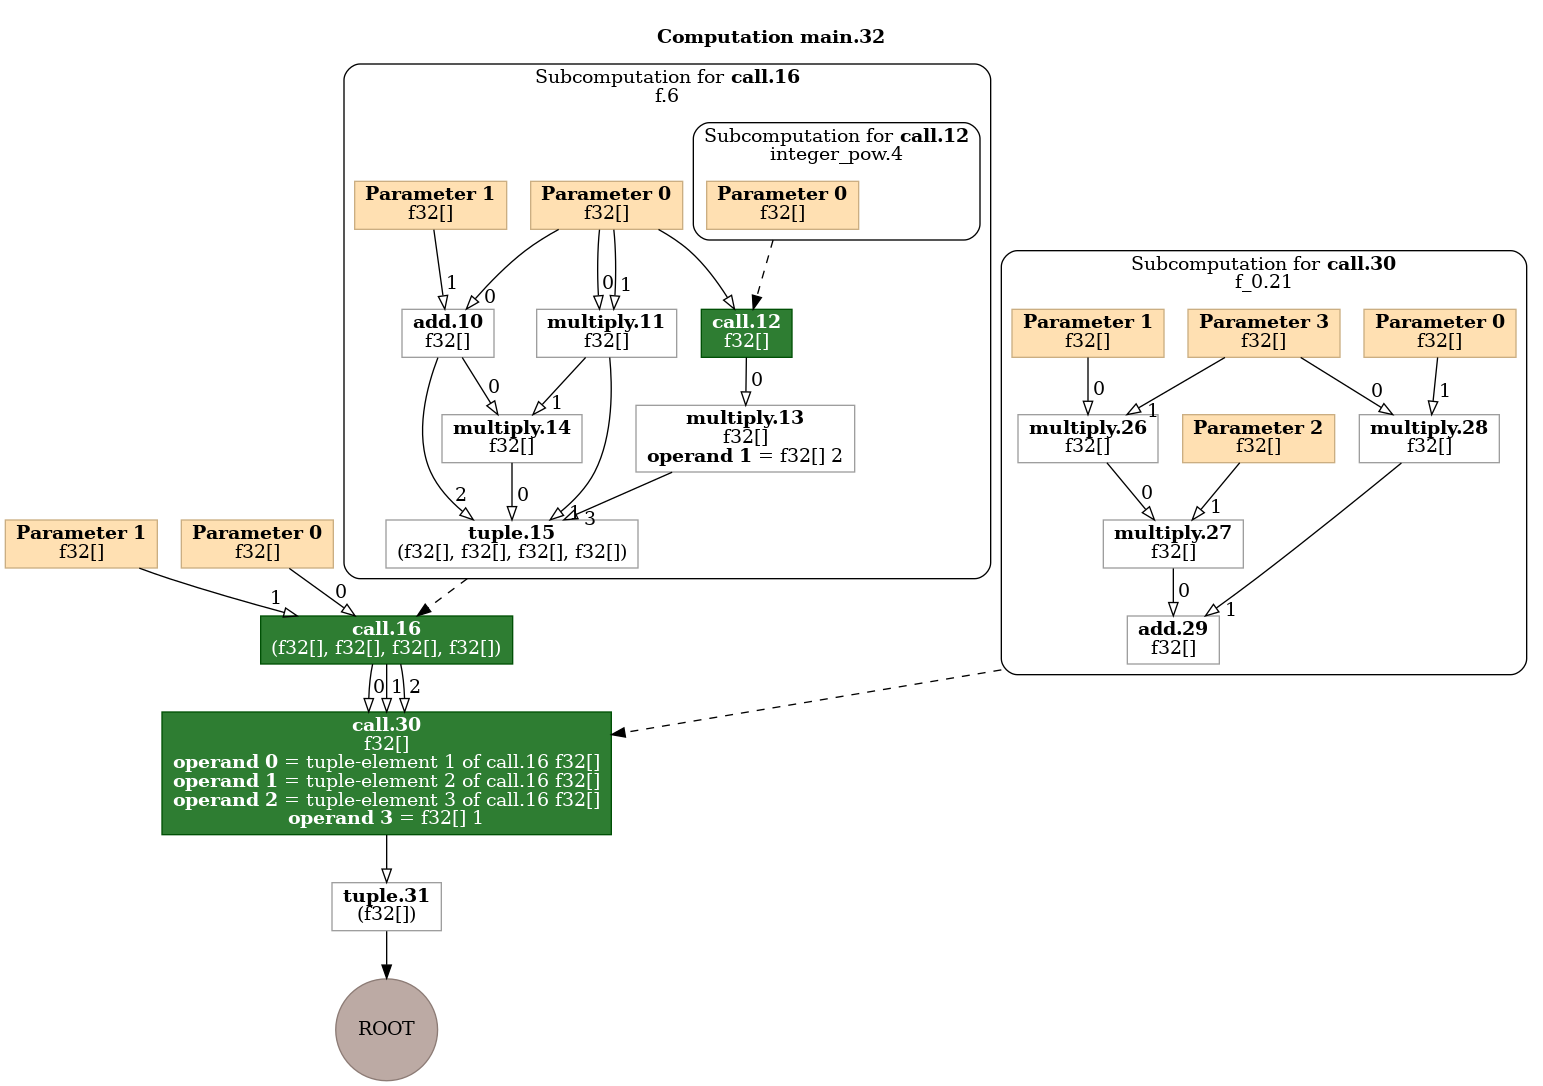

In [10]:
Image(convert_name)